### Matplotlib에서 폰트 설정

In [1]:
import urllib
from matplotlib import font_manager
from matplotlib import pyplot as plt

font_path = 'NanumGothic.ttf'
with open(font_path, 'wb') as f: 
    f.write(urllib.request.urlopen("https://github.com/team-monolith-product/jupyter-nanum/raw/main/NanumGothic.ttf").read())

# 글꼴을 등록합니다.
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = font_manager.FontProperties(fname=font_path).get_name()

### [Step1] 데이터 로드

In [2]:
import pandas as pd

df = pd.read_csv('./datasets/아이스크림_기온.csv')
df

,날짜,평균기온,최고기온,최저기온,일교차,아이스크림검색량
0,2020-01-01,-2.2,0.3,-6.5,6.8,11.05099
1,2020-01-02,1.0,3.8,-0.7,4.5,15.67595
2,2020-01-03,-0.1,4.6,-3.4,8.0,14.85324
3,2020-01-04,1.2,6.1,-2.8,8.9,13.32641
4,2020-01-05,1.3,6.6,-3.2,9.8,14.06018
...,...,...,...,...,...,...
896,2022-06-15,17.5,20.1,14.9,5.2,30.89238
897,2022-06-16,20.3,24.8,17.6,7.2,32.96768
898,2022-06-17,22.5,28.1,16.5,11.6,31.88556
899,2022-06-18,23.3,25.1,22.0,3.1,27.32730


### [Step2] 데이터 파악하기

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   날짜        901 non-null    object 
 1   평균기온      901 non-null    float64
 2   최고기온      901 non-null    float64
 3   최저기온      901 non-null    float64
 4   일교차       901 non-null    float64
 5   아이스크림검색량  901 non-null    float64
dtypes: float64(5), object(1)
memory usage: 42.4+ KB


In [4]:
df.describe()

,평균기온,최고기온,최저기온,일교차,아이스크림검색량
count,901.000000,901.000000,901.000000,901.000000,901.000000
mean,12.731521,17.514539,8.633185,8.881354,30.894103
std,10.143635,10.161335,10.434610,2.974059,9.729491
min,-14.900000,-10.700000,-18.600000,1.500000,11.050990
25%,5.000000,9.100000,0.600000,6.900000,23.473160
50%,13.100000,18.300000,8.400000,9.000000,29.825080
75%,21.500000,26.200000,18.000000,11.000000,37.303580
max,31.700000,36.500000,27.800000,17.900000,100.000000


### [Step3] 데이터 시각화하기

[-14.9  -10.24  -5.58  -0.92   3.74   8.4   13.06  17.72  22.38  27.04
  31.7 ]


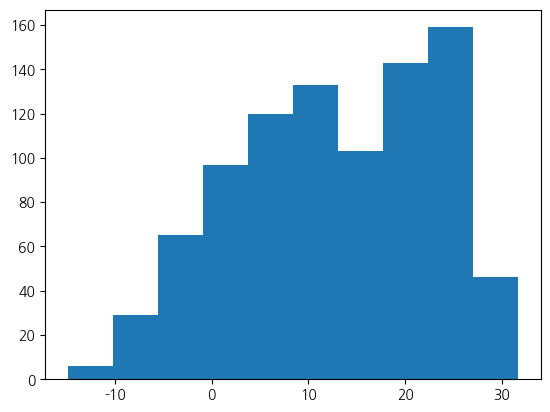

In [5]:
import matplotlib.pyplot as plt
import numpy as np

count, division = np.histogram(df['평균기온'], bins = 10)
print(division)
plt.hist(df['평균기온'],bins = division)
plt.show()

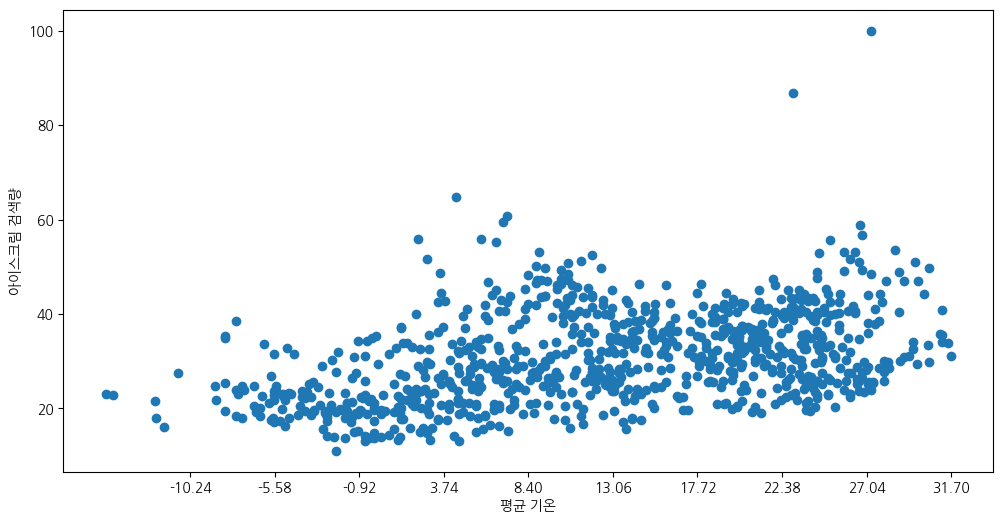

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.xlabel('평균 기온') # x축 제목 이름 정하기
plt.ylabel('아이스크림 검색량') # y축 제목 이름 정하기
plt.scatter(df['평균기온'], df['아이스크림검색량']) # 막대그래프 그리기
plt.xticks(division[1:]) # x축 눈금 이름 설정하기
plt.show( )

### [Step4] 데이터 계급별로 나누기

In [7]:
df['평균기온_단계'] = pd.cut(df['평균기온'], division, right = False, labels=division[:-1])
df

,날짜,평균기온,최고기온,최저기온,일교차,아이스크림검색량,평균기온_단계
0,2020-01-01,-2.2,0.3,-6.5,6.8,11.05099,-5.58
1,2020-01-02,1.0,3.8,-0.7,4.5,15.67595,-0.92
2,2020-01-03,-0.1,4.6,-3.4,8.0,14.85324,-0.92
3,2020-01-04,1.2,6.1,-2.8,8.9,13.32641,-0.92
4,2020-01-05,1.3,6.6,-3.2,9.8,14.06018,-0.92
...,...,...,...,...,...,...,...
896,2022-06-15,17.5,20.1,14.9,5.2,30.89238,13.06
897,2022-06-16,20.3,24.8,17.6,7.2,32.96768,17.72
898,2022-06-17,22.5,28.1,16.5,11.6,31.88556,22.38
899,2022-06-18,23.3,25.1,22.0,3.1,27.32730,22.38


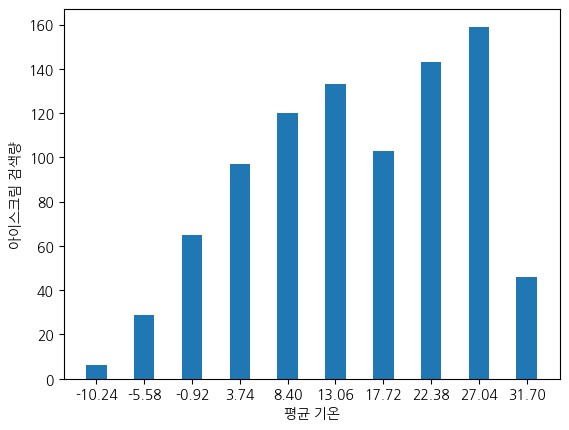

In [8]:
import matplotlib.pyplot as plt

plt.xlabel('평균 기온') # x축 제목 이름 정하기
plt.ylabel('아이스크림 검색량') # y축 제목 이름 정하기
plt.bar(division[1:], count, width = 2) # 막대그래프 그리기
plt.xticks(division[1:]) # x축 눈금 이름 설정하기
plt.show( )

### [Step5] 데이터 형태 변형하기

In [9]:
import numpy as np
X = np.array(df['평균기온'])
Y = np.array(df['아이스크림검색량'])

### [Step6] LSM으로 기울기와 절편 구하기

In [10]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

n = len(X)

temp1 = 0
temp2 = 0
for i in range(n):
    temp1 += (X[i] - mean_x)*(Y[i]-mean_y)
    temp2 += (X[i] - mean_x) ** 2
beta1 = temp1 / temp2
beta0 = mean_y - (beta1*mean_x)

print('기울기(beta1): {0}, 절편(beta0): {1}'.format(beta1, beta0))

기울기(beta1): 0.3949777590928455, 절편(beta0): 25.8654357687792


### [Step7] 학습결과 시각화하기

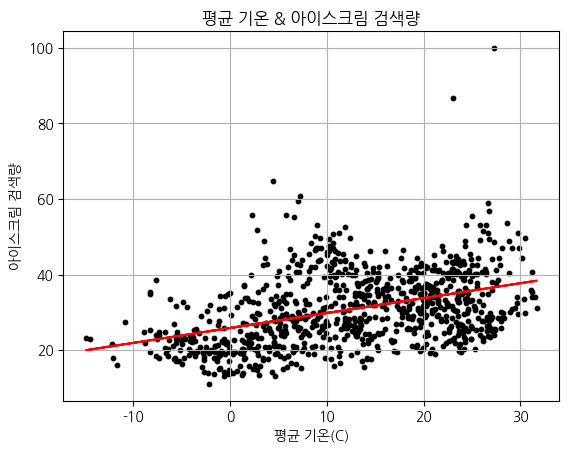

In [11]:
# 학습 결과 시각화하기
import matplotlib.pyplot as plt
Y_pred = beta0 + beta1 * X

plt.title('평균 기온 & 아이스크림 검색량')
plt.xlabel('평균 기온(C)')
plt.ylabel('아이스크림 검색량')
plt.scatter(X, Y, color = 'k', s = 10)
plt.plot(X,Y_pred, color = 'red')
plt.grid( )
plt.show( )

### [Step8] 손실값 확인하기

In [12]:
def RMSE(beta0, beta1, x, y) :
    RMSE = np.sqrt(((y - (beta0 + beta1 * x)) ** 2).mean( ))
    return RMSE

results = RMSE(beta0, beta1, X, Y)
print('손실값 결과는? {0}'.format(results))

손실값 결과는? 8.861355967301371


### [Step9] 아이스크림 쇼핑 클릭량 예측 프로그램 만들기

In [13]:
def Regression(beta0, beta1, X) :
    y_pred = beta0 + beta1 * X
    return y_pred

my_temp = float(input('안녕하세요. 오늘의 평균 기온을 입력해 주세요. : '))
predicted_value = Regression(beta0, beta1, my_temp)
print('아이스크림 쇼핑 클릭량은 {0:.2f}K 만큼 예상됩니다.'.format(predicted_value))

안녕하세요. 오늘의 평균 기온을 입력해 주세요. :  28


아이스크림 쇼핑 클릭량은 36.92K 만큼 예상됩니다.


### [Step10] scikit-learn의 linear regression을 이용해 기울기와 절편 구하기

In [14]:
from sklearn.linear_model import LinearRegression

X = X.reshape([-1,1])
reg = LinearRegression().fit(X,Y)
reg.score(X,Y)
print(reg.coef_, reg.intercept_)
reg.predict(np.array([[30]]))

[0.39497776] 25.8654357687792


array([37.71476854])

### [Step11] 학습결과 시각화하기

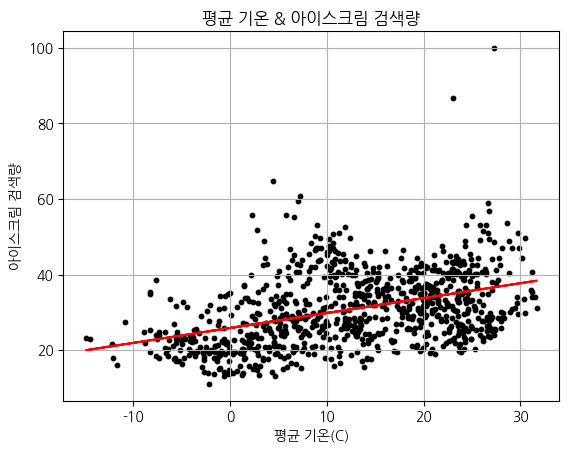

In [15]:
# 학습 결과 시각화하기
import matplotlib.pyplot as plt
Y_pred = reg.predict(X)

plt.title('평균 기온 & 아이스크림 검색량')
plt.xlabel('평균 기온(C)')
plt.ylabel('아이스크림 검색량')
plt.scatter(X, Y, color = 'k', s = 10)
plt.plot(X,Y_pred, color = 'red')
plt.grid( )
plt.show( )